In [1]:
import pandas,numpy,seaborn
import scipy,scipy.stats
import sklearn,sklearn.decomposition
import matplotlib,matplotlib.pyplot

matplotlib.rcParams.update({'font.size':18,'font.family':'Arial','xtick.labelsize':14,'ytick.labelsize':14,'axes.labelsize':18})
matplotlib.rcParams['pdf.fonttype']=42

In [2]:
def histogrammer(x):

    # get number of bins based on Rice's rule
    rice=int((len(x)**(1/3))*2)
    print('\t number of bins according to Rice: {}'.format(rice))

    counts,edges=numpy.histogram(x,bins=rice)
    half=(edges[1]-edges[0])/2
    centers=edges[:-1]+half

    return centers,counts

# 1. User defined variables

In [3]:
proteomics_file='/Volumes/omics4tb2/alomana/projects/uwm/data/proteomics/Fo-normalized-MS-073119.txt'
results_dir='/Volumes/omics4tb2/alomana/projects/uwm/results/proteomics/'

# 2. Read data

In [4]:
df=pandas.read_csv(proteomics_file,skiprows=2,usecols=[4,9,10,11],sep='\t',thousands=',',index_col=0)
print(df.shape)
df.head()

(1864, 3)


,HMDM,THP-1,iMAC
Accession Number,,,
ACTG_HUMAN,3628.7,4179.1,2884.8
VIME_HUMAN,3068.2,1475.1,1790.4
EF1A1_HUMAN,1474.7,1983.9,1165.6
KPYM_HUMAN,1475.9,1312.1,1284.9
G3P_HUMAN,1822.7,1164.2,1632.0


In [5]:
df.dropna(axis=0,inplace=True,how='all')
df.shape

(1862, 3)

In [6]:
df.sort_index().head(10)

,HMDM,THP-1,iMAC
Accession Number,,,
1433B_HUMAN,95.712,100.040,112.350
1433E_HUMAN,82.877,68.042,109.080
1433F_HUMAN,40.934,34.060,57.057
1433G_HUMAN,98.871,82.174,124.520
1433T_HUMAN,62.244,66.018,81.286
1433Z_HUMAN,183.900,135.380,209.610
1A02_HUMAN,0.000,40.300,0.000
1A03_HUMAN,178.630,20.875,49.627
1A24_HUMAN,170.820,0.000,0.000


In [7]:
df.sort_index().tail(10)

,HMDM,THP-1,iMAC
Accession Number,,,
XPP1_HUMAN,3.5805,1.7166,14.2570
XRCC5_HUMAN,28.6160,147.1100,36.5520
XRCC6_HUMAN,31.8570,116.6800,26.6280
XRN2_HUMAN,0.0000,8.5245,3.4542
YBOX1_HUMAN,62.8380,76.3030,50.9200
ZCCHV_HUMAN,0.0000,3.4443,0.0000
ZFR_HUMAN,0.0000,2.5805,0.0000
ZFY16_HUMAN,3.1934,0.0000,0.0000
ZN326_HUMAN,0.0000,2.6288,0.0000


In [8]:
print(df.shape)
df.head()

(1862, 3)


,HMDM,THP-1,iMAC
Accession Number,,,
ACTG_HUMAN,3628.7,4179.1,2884.8
VIME_HUMAN,3068.2,1475.1,1790.4
EF1A1_HUMAN,1474.7,1983.9,1165.6
KPYM_HUMAN,1475.9,1312.1,1284.9
G3P_HUMAN,1822.7,1164.2,1632.0


# 3. Variable exploration

In [9]:
df['Mean']=df.loc[:,['HMDM','THP-1','iMAC']].mean(axis=1)
df['log2Mean']=numpy.log2(df['Mean'])
df['STD']=df.loc[:,['HMDM','THP-1','iMAC']].std(axis=1)
df['CV']=df['STD']/df['Mean']
df.head()

,HMDM,THP-1,iMAC,Mean,log2Mean,STD,CV
Accession Number,,,,,,,
ACTG_HUMAN,3628.7,4179.1,2884.8,3564.200000,11.799363,649.556241,0.182245
VIME_HUMAN,3068.2,1475.1,1790.4,2111.233333,11.043870,843.618648,0.399586
EF1A1_HUMAN,1474.7,1983.9,1165.6,1541.400000,10.590026,413.207442,0.268073
KPYM_HUMAN,1475.9,1312.1,1284.9,1357.633333,10.406878,103.320924,0.076104
G3P_HUMAN,1822.7,1164.2,1632.0,1539.633333,10.588371,338.827778,0.220070


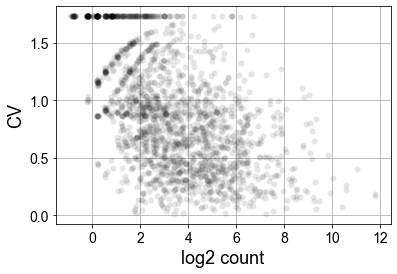

In [10]:
matplotlib.pyplot.plot(df['log2Mean'],df['CV'],'ok',alpha=0.1,mew=0)
matplotlib.pyplot.xlabel('log2 count')
matplotlib.pyplot.ylabel('CV')
matplotlib.pyplot.grid()

# 4. Visualization

In [11]:
df['HMDM_zscore']=(df['HMDM']-df['Mean'])/df['STD']
df['THP-1_zscore']=(df['THP-1']-df['Mean'])/df['STD']
df['iMAC_zscore']=(df['iMAC']-df['Mean'])/df['STD']
df.head()

,HMDM,THP-1,iMAC,Mean,log2Mean,STD,CV,HMDM_zscore,THP-1_zscore,iMAC_zscore
Accession Number,,,,,,,,,,
ACTG_HUMAN,3628.7,4179.1,2884.8,3564.200000,11.799363,649.556241,0.182245,0.099299,0.946646,-1.045945
VIME_HUMAN,3068.2,1475.1,1790.4,2111.233333,11.043870,843.618648,0.399586,1.134359,-0.754053,-0.380306
EF1A1_HUMAN,1474.7,1983.9,1165.6,1541.400000,10.590026,413.207442,0.268073,-0.161420,1.070891,-0.909471
KPYM_HUMAN,1475.9,1312.1,1284.9,1357.633333,10.406878,103.320924,0.076104,1.144654,-0.440698,-0.703956
G3P_HUMAN,1822.7,1164.2,1632.0,1539.633333,10.588371,338.827778,0.220070,0.835429,-1.108036,0.272607


In [12]:
pca=sklearn.decomposition.PCA(n_components=2)
principalComponents=pca.fit_transform(df.loc[:,['HMDM_zscore','THP-1_zscore','iMAC_zscore']].T)
principalDf=pandas.DataFrame(data=principalComponents,columns=['PC1','PC2'])
principalDf.head()

,PC1,PC2
0,-15.573803,28.889846
1,38.314615,-3.391242
2,-22.740811,-25.498603


In [13]:
explained=pca.explained_variance_ratio_
print(explained)

[0.5982002 0.4017998]


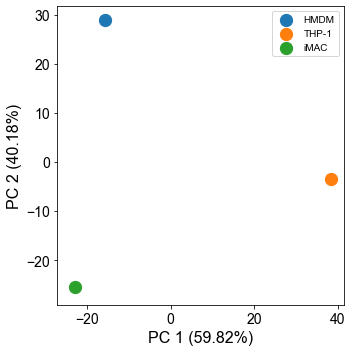

In [14]:
fig = matplotlib.pyplot.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1 ({:.2f}%)'.format(explained[0]*100),fontsize=16)
ax.set_ylabel('PC 2 ({:.2f}%)'.format(explained[1]*100),fontsize=16)
labels=['HMDM','THP-1','iMAC']
for i in range(3):
    ax.scatter(principalDf['PC1'][i],principalDf['PC2'][i],s=150,label=labels[i])
matplotlib.pyplot.legend()
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('{}/figures/pca_all_proteins.pdf'.format(results_dir))

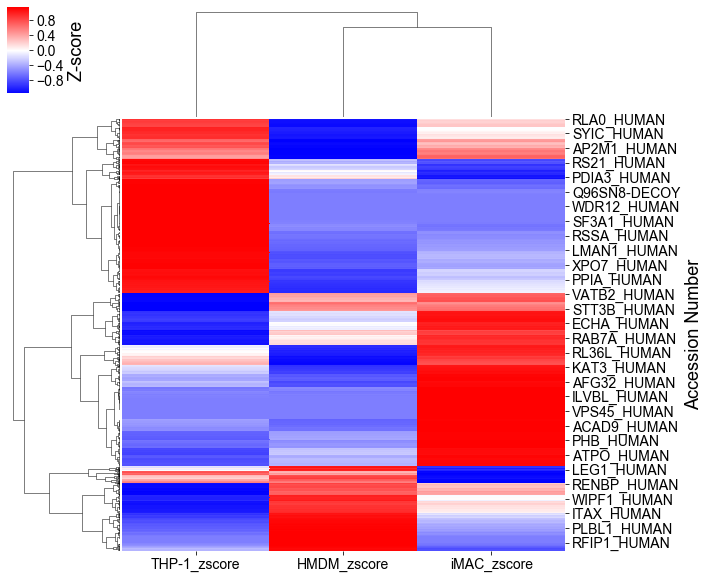

In [15]:
g=seaborn.clustermap(df.loc[:,['HMDM_zscore','THP-1_zscore','iMAC_zscore']],cmap='bwr',cbar_kws={'label': 'Z-score'})
matplotlib.pyplot.savefig('{}/figures/heatmap_all_proteins_zscore.pdf'.format(results_dir),bbox_inches='tight')

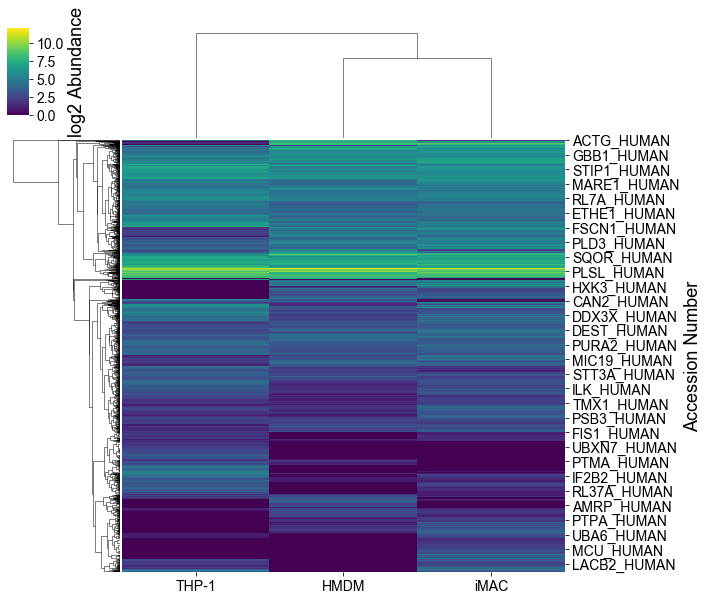

In [16]:
g=seaborn.clustermap(numpy.log2(df.loc[:,['HMDM','THP-1','iMAC']]+1),cmap='viridis',cbar_kws={'label': 'log2 Abundance'})
matplotlib.pyplot.savefig('{}/figures/heatmap_all_proteins_abundance.pdf'.format(results_dir),bbox_inches='tight')

# 4.1. Highly expressed, highly variable proteins (top 50%)

expression threshold 3.096479473030554
cv threshold 0.8433527433839325
number of highly expressed and highly variable proteins: 267



,HMDM,THP-1,iMAC,Mean,log2Mean,STD,CV,HMDM_zscore,THP-1_zscore,iMAC_zscore
Accession Number,,,,,,,,,,
UPAR_HUMAN,0.000,35.838,0.000,11.946000,3.578456,20.691079,1.732051,-0.577350,1.154701,-0.577350
DPP4_HUMAN,0.000,0.000,34.925,11.641667,3.541226,20.163958,1.732051,-0.577350,-0.577350,1.154701
1A02_HUMAN,0.000,40.300,0.000,13.433333,3.747745,23.267216,1.732051,-0.577350,1.154701,-0.577350
DRB3_HUMAN,163.220,0.000,0.000,54.406667,5.765712,94.235111,1.732051,1.154701,-0.577350,-0.577350
PPIH_HUMAN,0.000,39.811,0.000,13.270333,3.730133,22.984892,1.732051,-0.577350,1.154701,-0.577350
1A24_HUMAN,170.820,0.000,0.000,56.940000,5.831371,98.622973,1.732051,1.154701,-0.577350,-0.577350
DMB_HUMAN,56.128,0.000,0.000,18.709333,4.225686,32.405516,1.732051,1.154701,-0.577350,-0.577350
2B18_HUMAN,171.990,0.000,0.000,57.330000,5.841218,99.298473,1.732051,1.154701,-0.577350,-0.577350
2B1B_HUMAN,128.970,0.000,0.000,42.990000,5.425929,74.460864,1.732051,1.154701,-0.577350,-0.577350


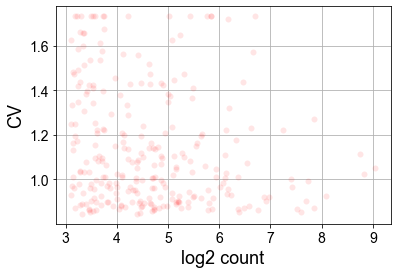

In [17]:
percentile_threshold=(1/2)*100
expression_threshold=numpy.percentile(df['log2Mean'],percentile_threshold)
cv_threshold=numpy.percentile(df['CV'],percentile_threshold)
hehv=df.loc[(df['log2Mean'] > expression_threshold) & (df['CV'] > cv_threshold)]
print('expression threshold',expression_threshold)
print('cv threshold',cv_threshold)
print('number of highly expressed and highly variable proteins:',hehv.shape[0])
print()

matplotlib.pyplot.plot(hehv['log2Mean'],hehv['CV'],'or',alpha=0.1,mew=0)
matplotlib.pyplot.xlabel('log2 count')
matplotlib.pyplot.ylabel('CV')
matplotlib.pyplot.grid()

hehv.sort_values(by=['CV'],ascending=False).head(10)

In [18]:
pca=sklearn.decomposition.PCA(n_components=2)
principalComponents=pca.fit_transform(hehv.loc[:,['HMDM_zscore','THP-1_zscore','iMAC_zscore']].T)
principalDf=pandas.DataFrame(data=principalComponents,columns=['PC1','PC2'])
principalDf.head()

,PC1,PC2
0,-5.453701,10.44176
1,15.007970,-1.74321
2,-9.554269,-8.69855


In [19]:
explained=pca.explained_variance_ratio_
print(explained)

[0.64843836 0.35156164]


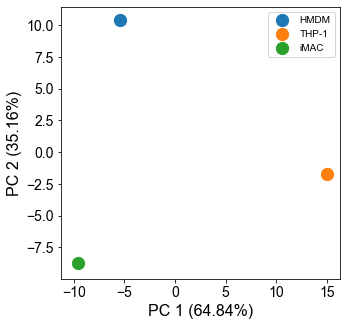

In [20]:
fig = matplotlib.pyplot.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1 ({:.2f}%)'.format(explained[0]*100),fontsize=16)
ax.set_ylabel('PC 2 ({:.2f}%)'.format(explained[1]*100),fontsize=16)
labels=['HMDM','THP-1','iMAC']
for i in range(3):
    ax.scatter(principalDf['PC1'][i],principalDf['PC2'][i],s=150,label=labels[i])
matplotlib.pyplot.legend()
matplotlib.pyplot.savefig('{}/figures/pca_highExpression_highVariable_proteins.pdf'.format(results_dir))

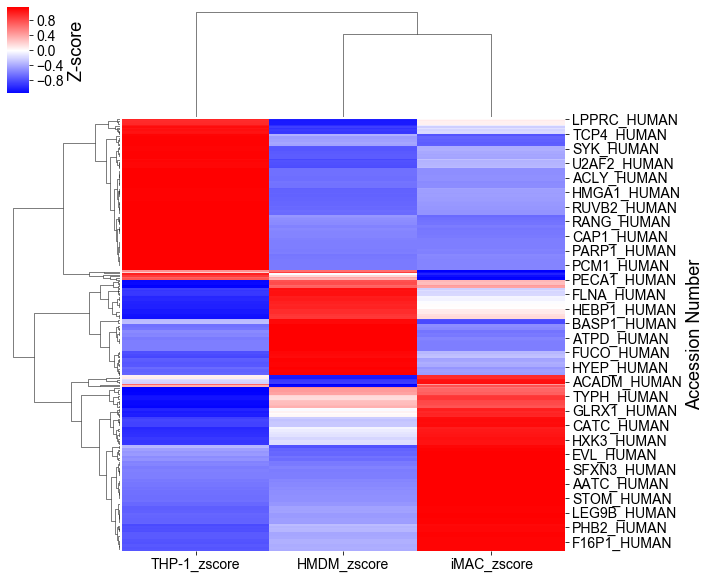

In [21]:
g=seaborn.clustermap(hehv.loc[:,['HMDM_zscore','THP-1_zscore','iMAC_zscore']],cmap='bwr',cbar_kws={'label': 'Z-score'})
matplotlib.pyplot.savefig('{}/figures/heatmap_highExpression_highVariable_proteins_zscore.pdf'.format(results_dir),bbox_inches='tight')

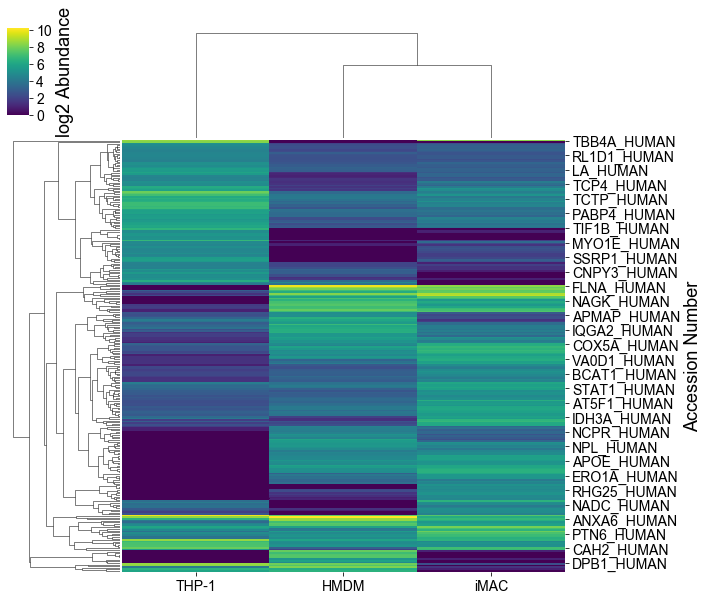

In [22]:
g=seaborn.clustermap(numpy.log2(hehv.loc[:,['HMDM','THP-1','iMAC']]+1),cmap='viridis',cbar_kws={'label': 'log2 Abundance'})
matplotlib.pyplot.savefig('{}/figures/heatmap_highExpression_highVariable_proteins_abundance.pdf'.format(results_dir),bbox_inches='tight')

# 5. Quantification

## 5.1. Correlation

Text(0.5, 0, 'log2 count')

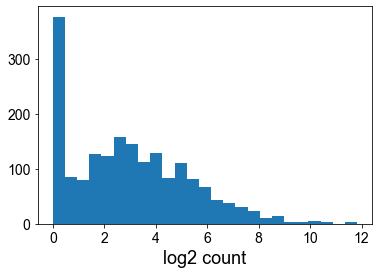

In [23]:
numpy.log2(df['HMDM']+1).hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 count')

Text(0.5, 0, 'log2 count')

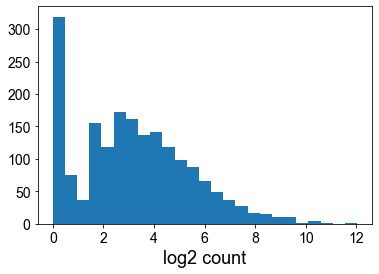

In [24]:
numpy.log2(df['THP-1']+1).hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 count')

Text(0.5, 0, 'log2 count')

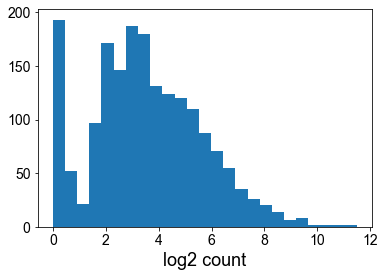

In [25]:
numpy.log2(df['iMAC']+1).hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 count')

,HMDM,THP-1,iMAC
HMDM,1.000000,0.882133,0.917650
THP-1,0.882133,1.000000,0.900638
iMAC,0.917650,0.900638,1.000000


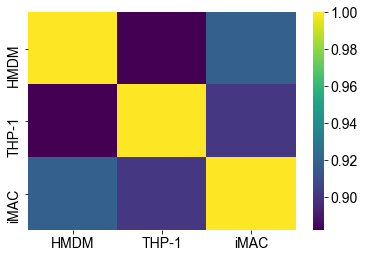

In [26]:
pearson=df.corr(method='pearson').iloc[:3,:3]
seaborn.heatmap(pearson,cmap='viridis')
pearson

,HMDM,THP-1,iMAC
HMDM,1.000000,0.366629,0.577964
THP-1,0.366629,1.000000,0.352209
iMAC,0.577964,0.352209,1.000000


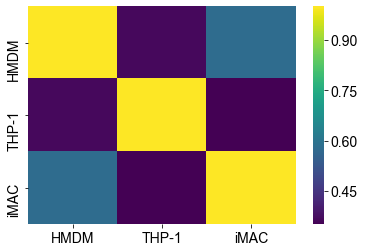

In [27]:
kendall=df.corr(method='kendall').iloc[:3,:3]
seaborn.heatmap(kendall,cmap='viridis')
kendall

,iMAC,HMDM,THP-1
iMAC,1.000000,0.740133,0.492295
HMDM,0.740133,1.000000,0.501479
THP-1,0.492295,0.501479,1.000000


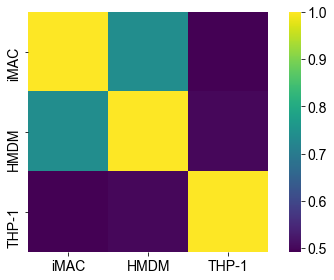

In [28]:
samples=['iMAC','HMDM','THP-1']
spearman=df.corr(method='spearman').loc[samples,samples]
seaborn.heatmap(spearman,cmap='viridis',square=True)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.savefig('{}/figures/spearman_heatmap.pdf'.format(results_dir))
spearman

In [29]:
# correlation dot plot

/Users/alomana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


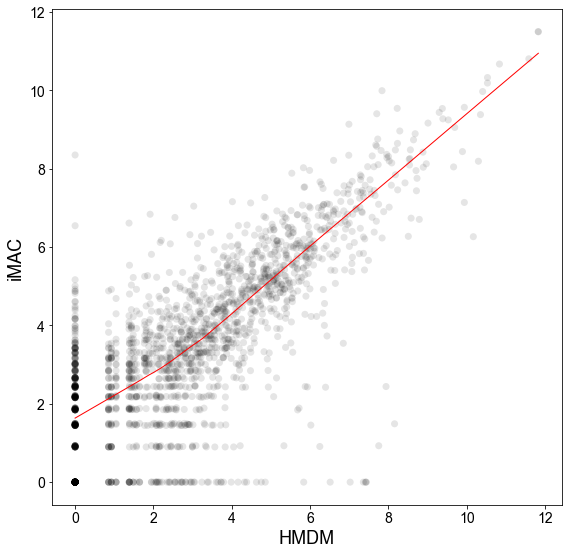

In [30]:
# HMDM - iMAC
matplotlib.pyplot.figure(None,(8,8))
seaborn.regplot(numpy.log2(df['HMDM']+1),numpy.log2(df['iMAC']+1),scatter_kws={"s": 50,'color':'black','alpha':0.1,'edgecolors':'none'},line_kws={'color':'red','linewidth':1},truncate=True,lowess=True)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.axes().set_aspect('equal')

matplotlib.pyplot.savefig('{}/figures/dotplot_imac.pdf'.format(results_dir))

/Users/alomana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


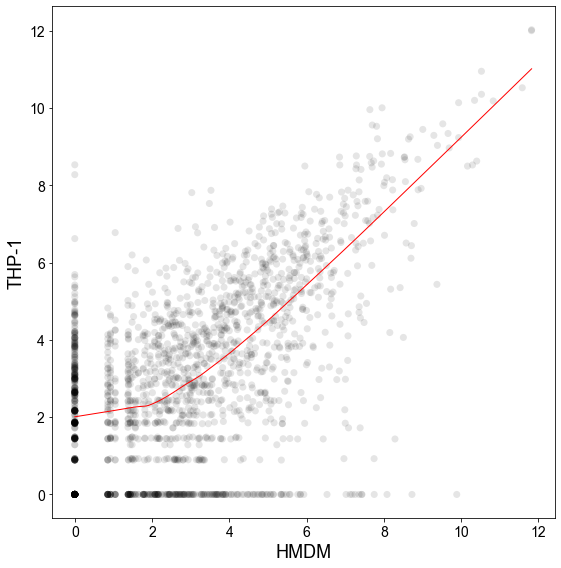

In [31]:
# HMDM - THP
matplotlib.pyplot.figure(None,(8,8))
seaborn.regplot(numpy.log2(df['HMDM']+1),numpy.log2(df['THP-1']+1),scatter_kws={"s": 50,'color':'black','alpha':0.1,'edgecolors':'none'},line_kws={'color':'red','linewidth':1},truncate=True,lowess=True)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.axes().set_aspect('equal')

matplotlib.pyplot.savefig('{}/figures/dotplot_thp.pdf'.format(results_dir))

# 5.2. Histogram of fold-change

In [32]:
df['log2FC THP']=numpy.log2((df['THP-1']+1)/(df['HMDM']+1))
df['log2FC iMAC']=numpy.log2((df['iMAC']+1)/(df['HMDM']+1))
df.head()

,HMDM,THP-1,iMAC,Mean,log2Mean,STD,CV,HMDM_zscore,THP-1_zscore,iMAC_zscore,log2FC THP,log2FC iMAC
Accession Number,,,,,,,,,,,,
ACTG_HUMAN,3628.7,4179.1,2884.8,3564.200000,11.799363,649.556241,0.182245,0.099299,0.946646,-1.045945,0.203687,-0.330879
VIME_HUMAN,3068.2,1475.1,1790.4,2111.233333,11.043870,843.618648,0.399586,1.134359,-0.754053,-0.380306,-1.056072,-0.776775
EF1A1_HUMAN,1474.7,1983.9,1165.6,1541.400000,10.590026,413.207442,0.268073,-0.161420,1.070891,-0.909471,0.427667,-0.339089
KPYM_HUMAN,1475.9,1312.1,1284.9,1357.633333,10.406878,103.320924,0.076104,1.144654,-0.440698,-0.703956,-0.169595,-0.199794
G3P_HUMAN,1822.7,1164.2,1632.0,1539.633333,10.588371,338.827778,0.220070,0.835429,-1.108036,0.272607,-0.646291,-0.159344


In [33]:
he=df[df['log2Mean'] > numpy.log2(10)]
he.shape

(866, 12)

Text(0.5, 0, 'log2 FC')

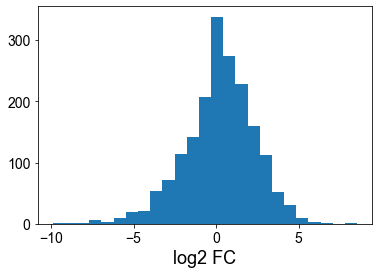

In [34]:
df['log2FC THP'].hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 FC')

Text(0.5, 0, 'log2 FC')

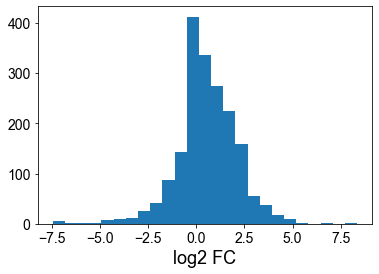

In [35]:
df['log2FC iMAC'].hist(grid=False,bins=25)
matplotlib.pyplot.xlabel('log2 FC')

	 number of bins according to Rice: 24
	 number of bins according to Rice: 24


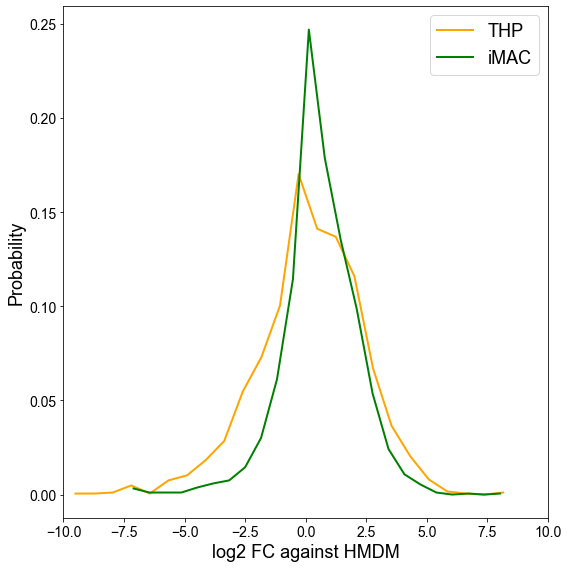

In [36]:
matplotlib.pyplot.figure(None,(8,8))

centersA,counts=histogrammer(df['log2FC THP'].tolist())
matplotlib.pyplot.plot(centersA,counts/sum(counts),'-',color='orange',lw=2,label='THP')

centersB,counts=histogrammer(df['log2FC iMAC'].tolist())
matplotlib.pyplot.plot(centersB,counts/sum(counts),'-',color='green',lw=2,label='iMAC')

matplotlib.pyplot.xlim(-10,10)
matplotlib.pyplot.xlabel('log2 FC against HMDM')
matplotlib.pyplot.ylabel('Probability')
matplotlib.pyplot.legend(fontsize=18)
matplotlib.pyplot.tight_layout()

matplotlib.pyplot.savefig('{}/figures/FC_PDF_proteomics.pdf'.format(results_dir))

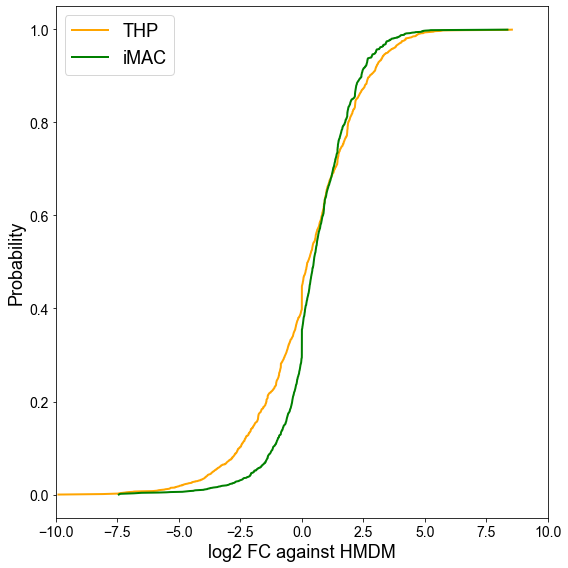

In [37]:
matplotlib.pyplot.figure(None,(8,8))

x=numpy.sort(df['log2FC THP'].tolist())
y=numpy.arange(x.shape[0])/x.shape[0]
matplotlib.pyplot.plot(x,y,'-',color='orange',lw=2,label='THP')

x=numpy.sort(df['log2FC iMAC'].tolist())
y=numpy.arange(x.shape[0])/x.shape[0]
matplotlib.pyplot.plot(x,y,'-',color='green',lw=2,label='iMAC')

matplotlib.pyplot.xlim(-10,10)
matplotlib.pyplot.xlabel('log2 FC against HMDM')
matplotlib.pyplot.ylabel('Probability')
matplotlib.pyplot.legend(fontsize=18)
matplotlib.pyplot.tight_layout()

matplotlib.pyplot.savefig('{}/figures/FC_CDF_proteomics.pdf'.format(results_dir))

In [38]:
# kolmogorov test of fold change
scipy.stats.ks_2samp(df['log2FC THP'].tolist(),df['log2FC iMAC'].tolist())

Ks_2sampResult(statistic=0.14930182599355532, pvalue=1.6314148123163844e-18)

# 5.3. Dot plot

In [39]:
df.head()

,HMDM,THP-1,iMAC,Mean,log2Mean,STD,CV,HMDM_zscore,THP-1_zscore,iMAC_zscore,log2FC THP,log2FC iMAC
Accession Number,,,,,,,,,,,,
ACTG_HUMAN,3628.7,4179.1,2884.8,3564.200000,11.799363,649.556241,0.182245,0.099299,0.946646,-1.045945,0.203687,-0.330879
VIME_HUMAN,3068.2,1475.1,1790.4,2111.233333,11.043870,843.618648,0.399586,1.134359,-0.754053,-0.380306,-1.056072,-0.776775
EF1A1_HUMAN,1474.7,1983.9,1165.6,1541.400000,10.590026,413.207442,0.268073,-0.161420,1.070891,-0.909471,0.427667,-0.339089
KPYM_HUMAN,1475.9,1312.1,1284.9,1357.633333,10.406878,103.320924,0.076104,1.144654,-0.440698,-0.703956,-0.169595,-0.199794
G3P_HUMAN,1822.7,1164.2,1632.0,1539.633333,10.588371,338.827778,0.220070,0.835429,-1.108036,0.272607,-0.646291,-0.159344


THP up: (246, 12)
THP down: (233, 12)
iMAC up: (230, 12)
iMAC down: (91, 12)


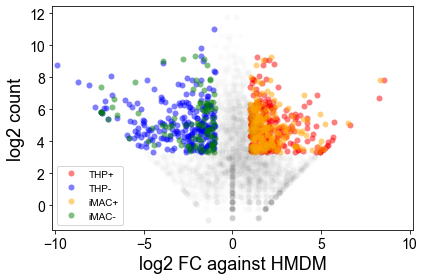

In [40]:
new=df.loc[(df['log2Mean'] > numpy.log2(10)) & (df['log2FC THP'] > 1)]
matplotlib.pyplot.plot(new['log2FC THP'],new['log2Mean'],'o',color='red',label='THP+',alpha=0.5,mew=0)
print('THP up: {}'.format(new.shape))

new=df.loc[(df['log2Mean'] > numpy.log2(10)) & (df['log2FC THP'] < -1)]
matplotlib.pyplot.plot(new['log2FC THP'],new['log2Mean'],'o',color='blue',label='THP-',alpha=0.5,mew=0)
print('THP down: {}'.format(new.shape))

new=df.loc[(df['log2Mean'] > numpy.log2(10)) & (df['log2FC iMAC'] > 1)]
matplotlib.pyplot.plot(new['log2FC iMAC'],new['log2Mean'],'o',color='orange',label='iMAC+',alpha=0.5,mew=0)
print('iMAC up: {}'.format(new.shape))

new=df.loc[(df['log2Mean'] > numpy.log2(10)) & (df['log2FC iMAC'] < -1)]
matplotlib.pyplot.plot(new['log2FC iMAC'],new['log2Mean'],'o',color='green',label='iMAC-',alpha=0.5,mew=0)
print('iMAC down: {}'.format(new.shape))

new=df.loc[df['log2Mean'] < numpy.log2(10)]
matplotlib.pyplot.plot(new['log2FC THP'],new['log2Mean'],'o',color='black',alpha=0.01,mew=0)
matplotlib.pyplot.plot(new['log2FC iMAC'],new['log2Mean'],'o',color='black',alpha=0.01,mew=0)

new=df.loc[(df['log2Mean'] > numpy.log2(10)) & (df['log2FC iMAC'] > -1) & (df['log2FC iMAC'] < 1)]
matplotlib.pyplot.plot(new['log2FC THP'],new['log2Mean'],'o',color='black',alpha=0.01,mew=0)
matplotlib.pyplot.plot(new['log2FC iMAC'],new['log2Mean'],'o',color='black',alpha=0.01,mew=0)

matplotlib.pyplot.xlim(-10.2,10.2)
matplotlib.pyplot.legend(loc=3)
matplotlib.pyplot.xlabel('log2 FC against HMDM')
matplotlib.pyplot.ylabel('log2 count')
matplotlib.pyplot.tight_layout()

# 5.4. Scatter FC

black 866


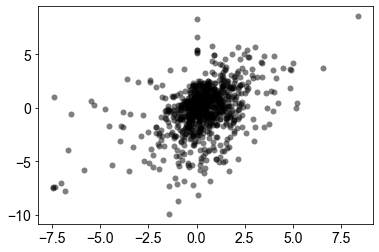

In [41]:
new=df.loc[(df['log2Mean'] > numpy.log2(10))]
theColor='black'
matplotlib.pyplot.plot(new['log2FC iMAC'],new['log2FC THP'],'o',color=theColor,alpha=0.5,mew=0)
print(theColor,new.shape[0])

iMAC THP
UP UP maroon 105
DOWN DOWN indigo 53
DOWN UP magenta 11
UP DOWN cyan 42
UP — orange 83
DOWN — green 27
— UP red 130
— DOWN blue 138
— — black 276


/Users/alomana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


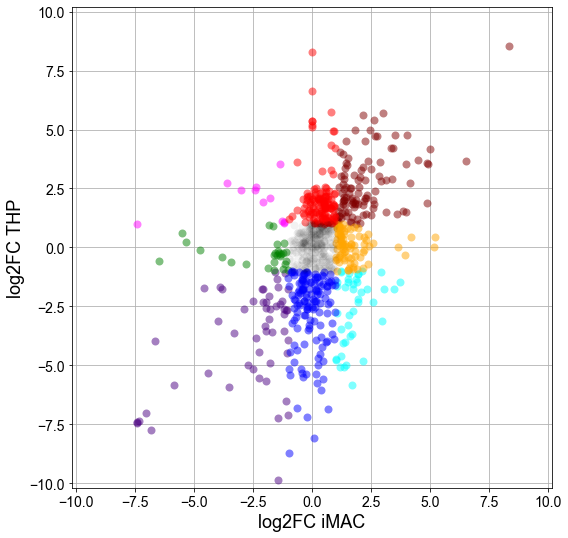

In [42]:
print('iMAC THP')
matplotlib.pyplot.figure(None,(8,8))
the_ms=8

theColor='maroon'
x=new.loc[(df['log2FC iMAC'] > 1) & (df['log2FC THP'] > 1)]
matplotlib.pyplot.plot(x['log2FC iMAC'],x['log2FC THP'],'o',color=theColor,alpha=0.5,mew=0,ms=the_ms)
print('UP UP',theColor,x.shape[0])
x.to_csv('{}tables/{}.txt'.format(results_dir,theColor),sep='\t')
maroon_members=x.index.to_list()

theColor='indigo'
x=new.loc[(df['log2FC iMAC'] < -1) & (df['log2FC THP'] < -1)]
matplotlib.pyplot.plot(x['log2FC iMAC'],x['log2FC THP'],'o',color=theColor,alpha=0.5,mew=0,ms=the_ms)
print('DOWN DOWN',theColor,x.shape[0])
x.to_csv('{}tables/{}.txt'.format(results_dir,theColor),sep='\t')
indigo_members=x.index.to_list()

theColor='magenta'
x=new.loc[(df['log2FC iMAC'] < -1) & (df['log2FC THP'] > 1)]
matplotlib.pyplot.plot(x['log2FC iMAC'],x['log2FC THP'],'o',color=theColor,alpha=0.5,mew=0,ms=the_ms)
print('DOWN UP',theColor,x.shape[0])
x.to_csv('{}tables/{}.txt'.format(results_dir,theColor),sep='\t')
magenta_members=x.index.to_list()

theColor='cyan'
x=new.loc[(df['log2FC iMAC'] > 1) & (df['log2FC THP'] < -1)]
matplotlib.pyplot.plot(x['log2FC iMAC'],x['log2FC THP'],'o',color=theColor,alpha=0.5,mew=0,ms=the_ms)
print('UP DOWN',theColor,x.shape[0])
x.to_csv('{}tables/{}.txt'.format(results_dir,theColor),sep='\t')
cyan_members=x.index.to_list()

theColor='orange'
x=new.loc[(df['log2FC iMAC'] > 1) & (df['log2FC THP'] > -1) & (df['log2FC THP'] < 1)]
matplotlib.pyplot.plot(x['log2FC iMAC'],x['log2FC THP'],'o',color=theColor,alpha=0.5,mew=0,ms=the_ms)
print('UP —',theColor,x.shape[0])
x.to_csv('{}tables/{}.txt'.format(results_dir,theColor),sep='\t')
orange_members=x.index.to_list()

theColor='green'
x=new.loc[(df['log2FC iMAC'] < -1) & (df['log2FC THP'] > -1) & (df['log2FC THP'] < 1)]
matplotlib.pyplot.plot(x['log2FC iMAC'],x['log2FC THP'],'o',color=theColor,alpha=0.5,mew=0,ms=the_ms)
print('DOWN —',theColor,x.shape[0])
x.to_csv('{}tables/{}.txt'.format(results_dir,theColor),sep='\t')
green_members=x.index.to_list()

theColor='red'
x=new.loc[(df['log2FC THP'] > 1) & (df['log2FC iMAC'] > -1) & (df['log2FC iMAC'] < 1)]
matplotlib.pyplot.plot(x['log2FC iMAC'],x['log2FC THP'],'o',color=theColor,alpha=0.5,mew=0,ms=the_ms)
print('— UP',theColor,x.shape[0])
x.to_csv('{}tables/{}.txt'.format(results_dir,theColor),sep='\t')
red_members=x.index.to_list()

theColor='blue'
x=new.loc[(df['log2FC THP'] < -1) & (df['log2FC iMAC'] > -1) & (df['log2FC iMAC'] < 1)]
matplotlib.pyplot.plot(x['log2FC iMAC'],x['log2FC THP'],'o',color=theColor,alpha=0.5,mew=0,ms=the_ms)
print('— DOWN',theColor,x.shape[0])
x.to_csv('{}tables/{}.txt'.format(results_dir,theColor),sep='\t')
blue_members=x.index.to_list()

theColor='black'
x=new.loc[(df['log2FC THP'] > -1) & (df['log2FC THP'] < 1) & (df['log2FC iMAC'] > -1) & (df['log2FC iMAC'] < 1)]
matplotlib.pyplot.plot(x['log2FC iMAC'],x['log2FC THP'],'o',color=theColor,alpha=0.05,mew=0,ms=the_ms)
print('— —',theColor,x.shape[0])
x.to_csv('{}tables/{}.txt'.format(results_dir,theColor),sep='\t')
black_members=x.index.to_list()

matplotlib.pyplot.xlabel('log2FC iMAC')
matplotlib.pyplot.ylabel('log2FC THP')

matplotlib.pyplot.grid()
matplotlib.pyplot.xlim(-10.2,10.2)
matplotlib.pyplot.ylim([-10.2,10.2])
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.axes().set_aspect('equal')
matplotlib.pyplot.savefig('{}/figures/protein_trends.pdf'.format(results_dir))

In [43]:
maroon=len(maroon_members)
indigo=len(indigo_members)
magenta=len(magenta_members)
cyan=len(cyan_members)
orange=len(orange_members)
green=len(green_members)
red=len(red_members)
blue=len(blue_members)

a=magenta+red+maroon; b=indigo+blue+cyan
print('THP DEPs: up, {}; down, {}; total, {}'.format(a,b,a+b))

a=maroon+orange+cyan; b=magenta+green+indigo
print('iMac DEPs: up, {}; down, {}; total, {}'.format(a,b,a+b))

print('THP DEPs not in iMac: up, {}; down, {}; total, {}'.format(red,blue,red+blue))

print('iMac DEPs not in THP: up, {}; down, {}; total, {}'.format(orange,green,orange+green))

ratio=(red+blue)/(orange+green)
print('Ratio DEPs THP over DEPs iMac: {}'.format(ratio))

THP DEPs: up, 246; down, 233; total, 479
iMac DEPs: up, 230; down, 91; total, 321
THP DEPs not in iMac: up, 130; down, 138; total, 268
iMac DEPs not in THP: up, 83; down, 27; total, 110
Ratio DEPs THP over DEPs iMac: 2.4363636363636365


## 5.5. Heatmap representation

In [44]:
changing = maroon_members + indigo_members + magenta_members + cyan_members + orange_members + green_members + red_members + blue_members

(589, 12)


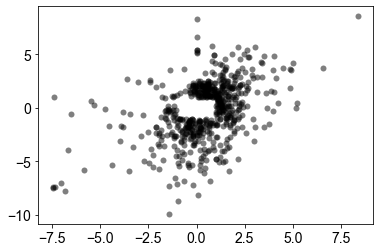

In [45]:
changing_df=df.loc[changing]
print(changing_df.shape)
matplotlib.pyplot.plot(changing_df['log2FC iMAC'], changing_df['log2FC THP'], 'o', color = theColor, alpha = 0.5, mew = 0)

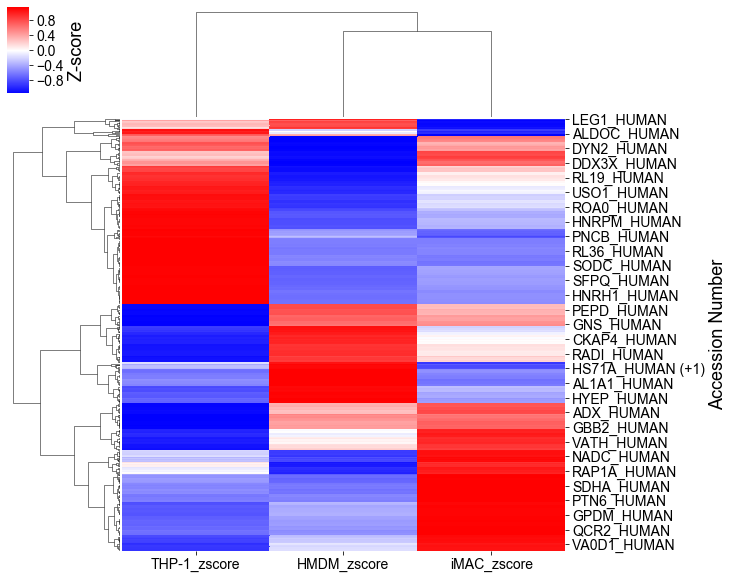

In [46]:
g=seaborn.clustermap(changing_df.loc[:,['HMDM_zscore','THP-1_zscore','iMAC_zscore']],cmap='bwr',cbar_kws={'label': 'Z-score'})

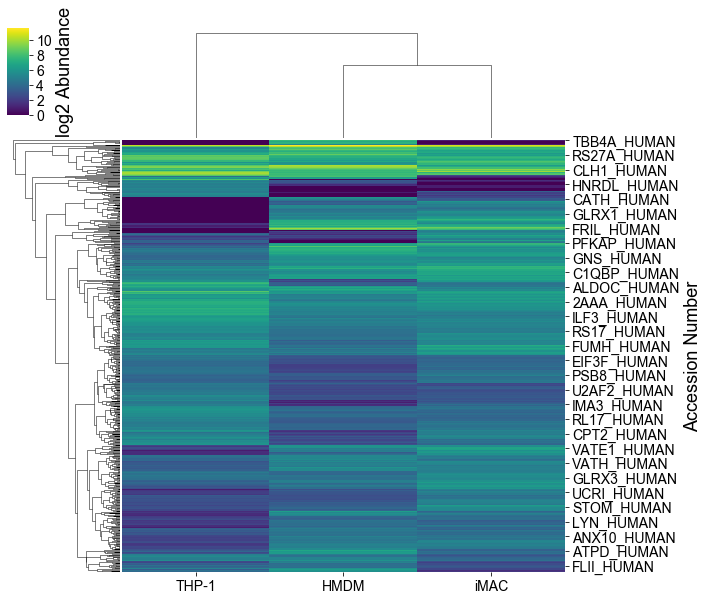

In [47]:
g=seaborn.clustermap(numpy.log2(changing_df.loc[:,['HMDM','THP-1','iMAC']]+1),cmap='viridis',cbar_kws={'label': 'log2 Abundance'})

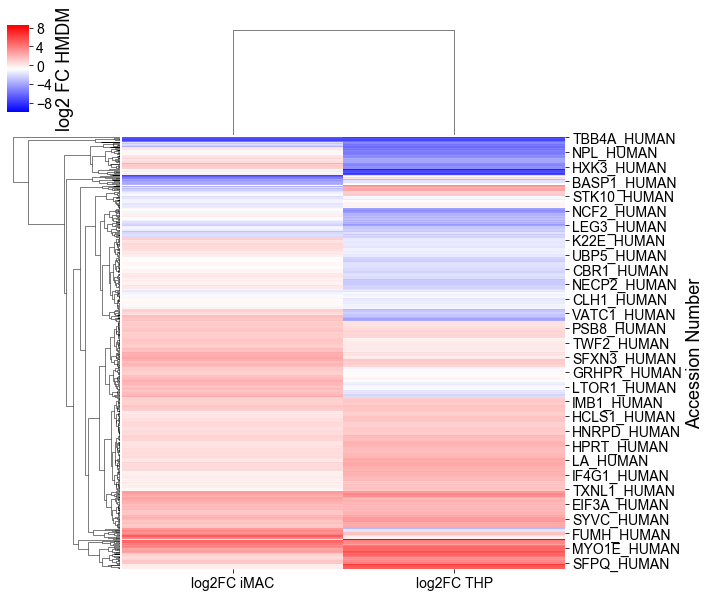

In [48]:
g=seaborn.clustermap(changing_df.loc[:,['log2FC iMAC','log2FC THP']],cmap='bwr',cbar_kws={'label': 'log2 FC HMDM'})

## 5.6. Candidates for experimental validation

ORANGE
                  relative_x  relative_y       opt
Accession Number                                  
ATPB_HUMAN          1.000000    0.266997  1.035030
DPP4_HUMAN          0.037361    1.000000  1.000698
TGM2_HUMAN          0.318637    0.925236  0.978566
ATPA_HUMAN          0.861772    0.304334  0.913931
MYOF_HUMAN          0.238509    0.825660  0.859419

BLUE
                  relative_x  relative_y       opt
Accession Number                                  
FRIH_HUMAN          0.543612    1.000000  1.138206
FRIL_HUMAN          0.615513    0.922731  1.109184
SODM_HUMAN          0.570521    0.951062  1.109060
VIME_HUMAN          1.000000    0.019595  1.000192
SAP3_HUMAN          0.409387    0.855258  0.948190

GREEN
                  relative_x  relative_y       opt
Accession Number                                  
DRA_HUMAN           0.744867   -1.000000  1.246927
LEG1_HUMAN          0.999987   -0.335106  1.054642
H13_HUMAN           0.387981   -0.969601  1.044344
POTEF_HUMAN

Text(0, 0.5, 'log2 NC iMAC - log2 NC THP')

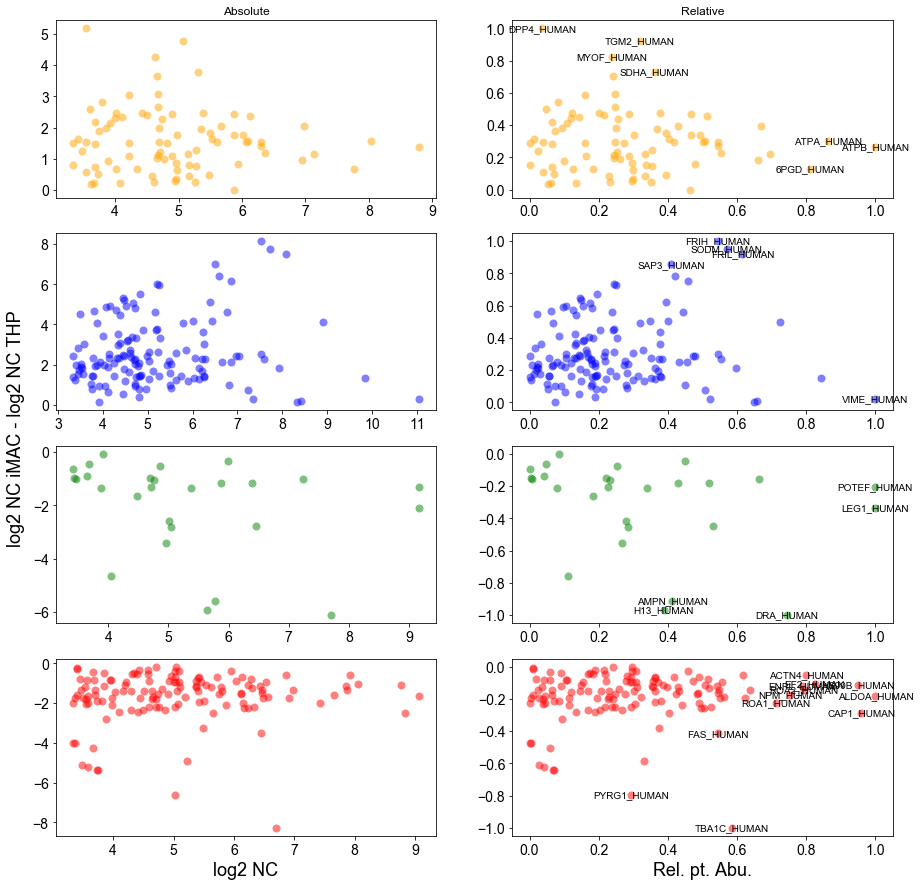

In [49]:
print('ORANGE')
candidates=df.loc[orange_members]
orangex=candidates['log2Mean']
imac=candidates['log2FC iMAC']
thp=candidates['log2FC THP']
orangey=imac-thp
orangexr=(orangex-numpy.min(orangex))/(numpy.max(orangex)-numpy.min(orangex))
orangeyr=(orangey-numpy.min(orangey))/(numpy.max(orangey)-numpy.min(orangey))

orangexr.rename('relative_x',inplace=True)
orangeyr.rename('relative_y',inplace=True)
cat=pandas.concat([orangexr,orangeyr],axis=1)
cat['opt']=numpy.sqrt(cat['relative_x']**2+cat['relative_y']**2)
top_orange=cat.nlargest(7,'opt')
print(top_orange.head())
print()

print('BLUE')
candidates=df.loc[blue_members]
bluex=candidates['log2Mean']
imac=candidates['log2FC iMAC']
thp=candidates['log2FC THP']
bluey=imac-thp
bluexr=(bluex-numpy.min(bluex))/(numpy.max(bluex)-numpy.min(bluex))
blueyr=(bluey-numpy.min(bluey))/(numpy.max(bluey)-numpy.min(bluey))

bluexr.rename('relative_x',inplace=True)
blueyr.rename('relative_y',inplace=True)
cat=pandas.concat([bluexr,blueyr],axis=1)
cat['opt']=numpy.sqrt(cat['relative_x']**2+cat['relative_y']**2)
top_blue=cat.nlargest(5,'opt')
print(top_blue.head())
print()

print('GREEN')
candidates=df.loc[green_members]
greenx=candidates['log2Mean']
imac=candidates['log2FC iMAC']
thp=candidates['log2FC THP']
greeny=imac-thp
greenxr=(greenx-numpy.min(greenx))/(numpy.max(greenx)-numpy.min(greenx))
greenyr=(greeny-numpy.max(greeny))/(numpy.max(greeny)-numpy.min(greeny))

greenxr.rename('relative_x',inplace=True)
greenyr.rename('relative_y',inplace=True)
cat=pandas.concat([greenxr,greenyr],axis=1)
cat['opt']=numpy.sqrt(cat['relative_x']**2+cat['relative_y']**2)
top_green=cat.nlargest(5,'opt')
print(top_green.head())
print()

print('RED')
candidates=df.loc[red_members]
redx=candidates['log2Mean']
imac=candidates['log2FC iMAC']
thp=candidates['log2FC THP']
redy=imac-thp
redxr=(redx-numpy.min(redx))/(numpy.max(redx)-numpy.min(redx))
redyr=(redy-numpy.max(redy))/(numpy.max(redy)-numpy.min(redy))

redxr.rename('relative_x',inplace=True)
redyr.rename('relative_y',inplace=True)
cat=pandas.concat([redxr,redyr],axis=1)
cat['opt']=numpy.sqrt(cat['relative_x']**2+cat['relative_y']**2)
top_red=cat.nlargest(12,'opt')
print(top_red.head())
print()

### figure
fig,axs=matplotlib.pyplot.subplots(4,2,figsize=(15,15))
(ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8) = axs

axs[0, 0].set_title('Absolute')
axs[0, 1].set_title('Relative')
axs[3, 0].set_xlabel('log2 NC')
axs[3, 1].set_xlabel('Rel. pt. Abu.')

ax1.plot(orangex,orangey,'o',color='orange',alpha=0.5,mew=0,ms=the_ms)

ax2.plot(orangexr,orangeyr,'o',color='orange',alpha=0.5,mew=0,ms=the_ms)
for row in top_orange.iterrows():
    name=row[0]
    x=row[1]['relative_x']
    y=row[1]['relative_y']
    ax2.text(x,y,name,horizontalalignment='center',fontsize=10,verticalalignment='center')

ax3.plot(bluex,bluey,'o',color='blue',alpha=0.5,mew=0,ms=the_ms)

ax4.plot(bluexr,blueyr,'o',color='blue',alpha=0.5,mew=0,ms=the_ms)
for row in top_blue.iterrows():
    name=row[0]
    x=row[1]['relative_x']
    y=row[1]['relative_y']
    ax4.text(x,y,name,horizontalalignment='center',fontsize=10,verticalalignment='center')
    
ax5.plot(greenx,greeny,'o',color='green',alpha=0.5,mew=0,ms=the_ms)

ax6.plot(greenxr,greenyr,'o',color='green',alpha=0.5,mew=0,ms=the_ms)
for row in top_green.iterrows():
    name=row[0]
    x=row[1]['relative_x']
    y=row[1]['relative_y']
    ax6.text(x,y,name,horizontalalignment='center',fontsize=10,verticalalignment='center')
    
ax7.plot(redx,redy,'o',color='red',alpha=0.5,mew=0,ms=the_ms)

ax8.plot(redxr,redyr,'o',color='red',alpha=0.5,mew=0,ms=the_ms)
for row in top_red.iterrows():
    name=row[0]
    x=row[1]['relative_x']
    y=row[1]['relative_y']
    ax8.text(x,y,name,horizontalalignment='center',fontsize=10,verticalalignment='center')

### hide tick and tick label of the big axis
fig.add_subplot(111,frameon=False)
matplotlib.pyplot.tick_params(labelcolor='none',top=False,bottom=False,left=False,right=False)
matplotlib.pyplot.ylabel("log2 NC iMAC - log2 NC THP")